In [52]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from functions import *
np.set_printoptions(edgeitems=30, linewidth = 1000000)
sp.init_printing(pretty_print=True, wrap_line=False, num_columns=1000)
plt.rcParams['text.usetex'] = True

<img src="./images/fig1.png" alt="robot configuration" style="height:250px">

# Problem 1

*Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.*

In [53]:
T = homogeneous()

print_homogeneous(T)

T04 = T[0]*T[1]*T[2]*T[3]
print('T04')
sp.pretty_print(T04.applyfunc(sp.trigsimp))
print("\n-----------------------\n")

T05 = T04*T[4]
print('T05')
sp.pretty_print(T05.applyfunc(sp.trigsimp))
print("\n-----------------------\n")

T01
⎡cos(θ₁)  0  sin(θ₁)   0 ⎤
⎢                        ⎥
⎢sin(θ₁)  0  -cos(θ₁)  0 ⎥
⎢                        ⎥
⎢   0     1     0      50⎥
⎢                        ⎥
⎣   0     0     0      1 ⎦

-----------------------

T12
⎡cos(θ₂)  -sin(θ₂)  0  93⋅cos(θ₂)⎤
⎢                                ⎥
⎢sin(θ₂)  cos(θ₂)   0  93⋅sin(θ₂)⎥
⎢                                ⎥
⎢   0        0      1      0     ⎥
⎢                                ⎥
⎣   0        0      0      1     ⎦

-----------------------

T23
⎡cos(θ₃)  -sin(θ₃)  0  93⋅cos(θ₃)⎤
⎢                                ⎥
⎢sin(θ₃)  cos(θ₃)   0  93⋅sin(θ₃)⎥
⎢                                ⎥
⎢   0        0      1      0     ⎥
⎢                                ⎥
⎣   0        0      0      1     ⎦

-----------------------

T34
⎡cos(θ₄)  -sin(θ₄)  0  50⋅cos(θ₄)⎤
⎢                                ⎥
⎢sin(θ₄)  cos(θ₄)   0  50⋅sin(θ₄)⎥
⎢                                ⎥
⎢   0        0      1      0     ⎥
⎢                                ⎥
⎣   0        0   

# Problem 3

*Find a sequence of 37 robot configurations $[q(j) = [q^{(j)}_1, q^{(j)}_2, q^{(j)}_3, q^{(j)}_4]^T = f(x_4^0 = [?,?,0]^T, o_4^0 = p^0(\varphi+j)), j = 0,1,...,36)]$ that are necessary for the stylus tip to track 36 equidistant points on a circle with $R=32 mm$
and $p^0_c = [150,0,120]^Tmm$. The tracked points start at $\varphi_0 =0$ and end at $\varphi_{36} =2\pi$, while the stylus remains horizontal at all configuration.*

In [54]:
phi = np.linspace(0, 2*np.pi, 37)
p0c = np.array([150, 0, 120])
R = 32

output = []
output_ed = []
for i in range(len(phi)):
    p0 = p0c + R*np.array([0, np.cos(phi[i]), np.sin(phi[i])])

    elbow_up, elbow_down = inverse(p0[0],p0[1],p0[2])

    output.append(elbow_up)
    output_ed.append(elbow_down)#*180/np.pi)

#print("Elbow up:")
#EU = sp.Matrix(output)
#sp.pretty_print(EU)
#print("\n-----------------------\n")
print("Elbow down:")
ED = (sp.Matrix(output_ed)*180/sp.pi).applyfunc(lambda x: 0 if abs(x) < 1e-8 else x)
ED_rad = sp.Matrix(output_ed).applyfunc(lambda x: 0 if abs(x) < 1e-8 else x)
sp.pretty_print(ED.evalf(5))

Elbow down:
⎡12.043   49.517  -49.969  0.45294⎤
⎢                                 ⎥
⎢11.865   49.498  -46.515  -2.9837⎥
⎢                                 ⎥
⎢11.336   49.366  -42.965  -6.4012⎥
⎢                                 ⎥
⎢10.467   49.116  -39.404  -9.712 ⎥
⎢                                 ⎥
⎢9.2814   48.758  -35.936  -12.822⎥
⎢                                 ⎥
⎢7.8082   48.32   -32.691  -15.629⎥
⎢                                 ⎥
⎢6.0885   47.849  -29.832  -18.017⎥
⎢                                 ⎥
⎢4.1731   47.416  -27.555  -19.861⎥
⎢                                 ⎥
⎢2.1215   47.106  -26.071  -21.035⎥
⎢                                 ⎥
⎢   0     46.992  -25.553  -21.439⎥
⎢                                 ⎥
⎢-2.1215  47.106  -26.071  -21.035⎥
⎢                                 ⎥
⎢-4.1731  47.416  -27.555  -19.861⎥
⎢                                 ⎥
⎢-6.0885  47.849  -29.832  -18.017⎥
⎢                                 ⎥
⎢-7.8082  48.32   -32.691  -15.629⎥
⎢               

# Problem 4

Determine the Jacobian of the manipulator for the robot end-effector and the Jacobian for the robot camera (as a function of the joint configuration q). Report the numerical results for the two Jacobians at $\varphi = 0$, $\varphi = \pi/2$, $\varphi = \pi$, and $\varphi = 3\pi/2$ along the path studies in Problem 3.

We use ELBOW DOWN configuration

In [55]:
theta = sp.Matrix([ED_rad[0,:],ED_rad[9,:],ED_rad[18,:],ED_rad[27,:],ED_rad[36,:]])
#sp.pprint((theta*180/sp.pi).applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(5))
J4 = []
J5 = []

# J4_anal, J5_anal = anal_jacobian()
# sp.pretty_print(J4_anal)
# sp.pretty_print(J5_anal)
# print("\n-----------------------\n")

for i in range(len(theta[1,:])):
    print(f'Angle {sp.pi/2*i}:\n')
    Ji, Jj = jacobian(theta[i,0],theta[i,1],theta[i,2],theta[i,3])
    J4.append(Ji)
    J5.append(Jj)

    sp.pretty_print(((J4[i]).evalf(5)).applyfunc(lambda x: 0 if abs(x) < 1e-8 else x) )
    sp.pretty_print(((J5[i]).evalf(5)).applyfunc(lambda x: 0 if abs(x) < 1e-8 else x) )
    print("\n-----------------------\n")

Angle 0:

⎡-42.432  -68.459    0.719       0    ⎤
⎢                                     ⎥
⎢ 198.9   -14.605   0.15339      0    ⎥
⎢                                     ⎥
⎢   0      203.38    143.0      50.0  ⎥
⎢                                     ⎥
⎢   0     0.20864   0.20864   0.20864 ⎥
⎢                                     ⎥
⎢   0     -0.97799  -0.97799  -0.97799⎥
⎢                                     ⎥
⎣  1.0       0         0         0    ⎦
⎡-39.302  -112.47   -43.291    -44.01 ⎤
⎢                                     ⎥
⎢184.23   -23.993   -9.2354   -9.3887 ⎥
⎢                                     ⎥
⎢   0      188.38    128.0      35.0  ⎥
⎢                                     ⎥
⎢   0     0.20864   0.20864   0.20864 ⎥
⎢                                     ⎥
⎢   0     -0.97799  -0.97799  -0.97799⎥
⎢                                     ⎥
⎣  1.0       0         0         0    ⎦

-----------------------

Angle pi/2:

⎡  0    -102.0  -33.993   0  ⎤
⎢                            ⎥
⎢200.0   

# Problem 5

Compute the joint velocities $\dot{p}$ at $\varphi = \pi/2$, along the path from Problem 3, so that the stylus tip velocity is $v^0_4 = [0, -3, 0]mm/s$ and $\dot{x_4} = [?,?,0]$.

In [56]:
#theta90 = sp.Matrix([ED[9,:]])
#theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4')
#T05 = T05.subs({theta1: theta90[0], theta2: theta90[1], theta3: theta90[2], theta4: theta90[3]})
#T05 = T05.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x) # remove small numbers
#T05 = T05.evalf(5)
#sp.pretty_print(T05)

#R90 = T05[0:3, 0:3]
#wx, wy, wz = sp.symbols('wx wy wz')
#S = sp.Matrix([
#    [0, -wz, wy],
#    [wz, 0, -wx],
#    [-wy, wx, 0]
#])
#dR = S*R90
#dx = dR[:, 0]
#dx = dx.subs(wy, 0)
v = sp.Matrix([0, -3, 0, 0, 0, 0])
J4_anal = (J4[1].T*J4[1]).inv()*J4[1].T # pseudoinverse of an underactuated arm (joints<6)
dq90 = J4_anal * v 
sp.pprint(J4_anal.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(3))
print("\n-----------------------\n")
sp.pprint(dq90.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(5))


⎡   0     0.005     0      0    0     2.5e-5⎤
⎢                                           ⎥
⎢-0.0232    0    -0.00911  0  -0.456    0   ⎥
⎢                                           ⎥
⎢0.0402     0     0.0273   0   1.37     0   ⎥
⎢                                           ⎥
⎣-0.017     0    -0.0182   0  -1.91     0   ⎦

-----------------------

⎡-0.015⎤
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎣  0   ⎦


# Problem 6

In this part, the goal is to plan a trajectory which approximates the circular path from
Problem 3 by means of 5 knot-points at $φ_0, φ_9, φ_{18}, φ_{27}, φ_{36}$.

Use the inverse computed joint configurations $q^{(0)}, q^{(9)}, q^{(18)}, q^{(27)}, q^{(36)}$ from Problem 3, to find suitable interpolation polynomials for the following segments:

<img src="./images/ex6.png" alt="segments" style="height:700px">

In [57]:
aij = sp.Matrix([[sp.symbols(f'a{j}{i}') for i in range(0, 6)] for j in range(1,5)])
t = sp.Matrix([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 2, 0, 0, 0],
    [1, 2, 4, 8, 16, 32],
    [0, 1, 4, 12, 32, 80],
    [0, 0, 2, 12, 48, 160]
])
sp.pprint(aij)
v0 = sp.Matrix([0,0,0,0,0,0])
v90 = sp.Matrix([0,-25,0,0,0,0])

dq0 = calc_dq(J4[0], v0)
dq90 = calc_dq(J4[1], v90)

for j in range(len(aij[:,0])):
    q = sp.Matrix([theta[0,j], dq0[j], 0, theta[1, j], dq90[j], 0])
    sol = t.inv() * q
    for i,element in enumerate(sol):
        aij[j,i] = sol[i]
print("aij:")
sp.pprint(aij.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(4))
print("\n-----------------------\n")

bij = sp.Matrix([[sp.symbols(f'b{j}{i}') for i in range(0, 6)] for j in range(1,5)])
v180 = sp.Matrix([0,0,-25,0,0,0])
dq180 = calc_dq(J4[2], v180)

for j in range(len(bij[:,0])):
    q = sp.Matrix([theta[1,j], dq90[j], 0, theta[2, j], dq180[j], 0])
    sol = t.inv() * q
    for i,element in enumerate(sol):
        bij[j,i] = sol[i]
print("bij:")
sp.pprint(bij.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(4))
print("\n-----------------------\n")

cij = sp.Matrix([[sp.symbols(f'c{j}{i}') for i in range(0, 6)] for j in range(1,5)])
v270 = sp.Matrix([0,25,0,0,0,0])
dq270 = calc_dq(J4[3], v270)

for j in range(len(cij[:,0])):
    q = sp.Matrix([theta[2,j], dq180[j], 0, theta[3, j], dq270[j], 0])
    sol = t.inv() * q
    for i,element in enumerate(sol):
        cij[j,i] = sol[i]
print("C:")
sp.pprint(cij.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(4))
print("\n-----------------------\n")

dij = sp.Matrix([[sp.symbols(f'd{j}{i}') for i in range(0, 6)] for j in range(1,5)])

for j in range(len(dij[:,0])):
    q = sp.Matrix([theta[3,j], dq270[j], 0, theta[4, j], dq0[j], 0])
    sol = t.inv() * q
    for i,element in enumerate(sol):
        dij[j,i] = sol[i]
print("D:")
sp.pprint(dij.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x).evalf(4))

⎡a₁₀  a₁₁  a₁₂  a₁₃  a₁₄  a₁₅⎤
⎢                            ⎥
⎢a₂₀  a₂₁  a₂₂  a₂₃  a₂₄  a₂₅⎥
⎢                            ⎥
⎢a₃₀  a₃₁  a₃₂  a₃₃  a₃₄  a₃₅⎥
⎢                            ⎥
⎣a₄₀  a₄₁  a₄₂  a₄₃  a₄₄  a₄₅⎦
aij:
⎡ 0.2102   0  0  -0.1377   0.08767  -0.01597⎤
⎢                                           ⎥
⎢ 0.8642   0  0  -0.05507  0.0413   -0.00826⎥
⎢                                           ⎥
⎢-0.8721   0  0   0.5327   -0.3995   0.0799 ⎥
⎢                                           ⎥
⎣0.007905  0  0  -0.4776   0.3582   -0.07164⎦

-----------------------

bij:
⎡   0     -0.125  0  -0.07523  0.07205   -0.01597⎤
⎢                                                ⎥
⎢0.8202     0     0  0.05785   -0.04373  0.008781⎥
⎢                                                ⎥
⎢-0.446     0     0  -0.2684    0.1683   -0.03036⎥
⎢                                                ⎥
⎣-0.3742    0     0   0.2106   -0.1246   0.02157 ⎦

-----------------------

C:
⎡-0.2102       0      0  0.1377   -0.08

# Problem 7

Plot the actual path of the end-effector for the entire period from = 0 to 8 s for the interpolated trajectory from problem 6 and compare it to the exact desired circular path. Try to improve the approximation either by using more knot-points or by using different interpolation functions that those found in Problem 6.

In [183]:
t1 = np.linspace(0, 2, 100)

# A:
q1_1 = aij[0, 0] + aij[0, 1] * t1 + aij[0, 2] * t1**2 + aij[0, 3] * t1**3 + aij[0, 4] * t1**4 + aij[0, 5] * t1**5
q1_1dot = aij[0, 1] + 2 * aij[0, 2] * t1 + 3 * aij[0, 3] * t1**2 + 4 * aij[0, 4] * t1**3 + 5 * aij[0, 5] * t1**4
q1_1dotdot = 2 * aij[0, 2] + 6 * aij[0, 3] * t1 + 12 * aij[0, 4] * t1**2 + 20 * aij[0, 5] * t1**3

q2_1 = aij[1, 0] + aij[1, 1] * t1 + aij[1, 2] * t1**2 + aij[1, 3] * t1**3 + aij[1, 4] * t1**4 + aij[1, 5] * t1**5
q2_1dot = aij[1, 1] + 2 * aij[1, 2] * t1 + 3 * aij[1, 3] * t1**2 + 4 * aij[1, 4] * t1**3 + 5 * aij[1, 5] * t1**4
q2_1dotdot = 2 * aij[1, 2] + 6 * aij[1, 3] * t1 + 12 * aij[1, 4] * t1**2 + 20 * aij[1, 5] * t1**3

q3_1 = aij[2, 0] + aij[2, 1] * t1 + aij[2, 2] * t1**2 + aij[2, 3] * t1**3 + aij[2, 4] * t1**4 + aij[2, 5] * t1**5
q3_1dot = aij[2, 1] + 2 * aij[2, 2] * t1 + 3 * aij[2, 3] * t1**2 + 4 * aij[2, 4] * t1**3 + 5 * aij[2, 5] * t1**4
q3_1dotdot = 2 * aij[2, 2] + 6 * aij[2, 3] * t1 + 12 * aij[2, 4] * t1**2 + 20 * aij[2, 5] * t1**3

q4_1 = aij[3, 0] + aij[3, 1] * t1 + aij[3, 2] * t1**2 + aij[3, 3] * t1**3 + aij[3, 4] * t1**4 + aij[3, 5] * t1**5
q4_1dot = aij[3, 1] + 2 * aij[3, 2] * t1 + 3 * aij[3, 3] * t1**2 + 4 * aij[3, 4] * t1**3 + 5 * aij[3, 5] * t1**4
q4_1dotdot = 2 * aij[3, 2] + 6 * aij[3, 3] * t1 + 12 * aij[3, 4] * t1**2 + 20 * aij[3, 5] * t1**3

# B:
q1_2 = bij[0, 0] + bij[0, 1] * t1 + bij[0, 2] * t1**2 + bij[0, 3] * t1**3 + bij[0, 4] * t1**4 + bij[0, 5] * t1**5
q1_2dot = bij[0, 1] + 2 * bij[0, 2] * t1 + 3 * bij[0, 3] * t1**2 + 4 * bij[0, 4] * t1**3 + 5 * bij[0, 5] * t1**4
q1_2dotdot = 2 * bij[0, 2] + 6 * bij[0, 3] * t1 + 12 * bij[0, 4] * t1**2 + 20 * bij[0, 5] * t1**3

q2_2 = bij[1, 0] + bij[1, 1] * t1 + bij[1, 2] * t1**2 + bij[1, 3] * t1**3 + bij[1, 4] * t1**4 + bij[1, 5] * t1**5
q2_2dot = bij[1, 1] + 2 * bij[1, 2] * t1 + 3 * bij[1, 3] * t1**2 + 4 * bij[1, 4] * t1**3 + 5 * bij[1, 5] * t1**4
q2_2dotdot = 2 * bij[1, 2] + 6 * bij[1, 3] * t1 + 12 * bij[1, 4] * t1**2 + 20 * bij[1, 5] * t1**3

q3_2 = bij[2, 0] + bij[2, 1] * t1 + bij[2, 2] * t1**2 + bij[2, 3] * t1**3 + bij[2, 4] * t1**4 + bij[2, 5] * t1**5
q3_2dot = bij[2, 1] + 2 * bij[2, 2] * t1 + 3 * bij[2, 3] * t1**2 + 4 * bij[2, 4] * t1**3 + 5 * bij[2, 5] * t1**4
q3_2dotdot = 2 * bij[2, 2] + 6 * bij[2, 3] * t1 + 12 * bij[2, 4] * t1**2 + 20 * bij[2, 5] * t1**3

q4_2 = bij[3, 0] + bij[3, 1] * t1 + bij[3, 2] * t1**2 + bij[3, 3] * t1**3 + bij[3, 4] * t1**4 + bij[3, 5] * t1**5
q4_2dot = bij[3, 1] + 2 * bij[3, 2] * t1 + 3 * bij[3, 3] * t1**2 + 4 * bij[3, 4] * t1**3 + 5 * bij[3, 5] * t1**4
q4_2dotdot = 2 * bij[3, 2] + 6 * bij[3, 3] * t1 + 12 * bij[3, 4] * t1**2 + 20 * bij[3, 5] * t1**3

# C:
q1_3 = cij[0, 0] + cij[0, 1] * t1 + cij[0, 2] * t1**2 + cij[0, 3] * t1**3 + cij[0, 4] * t1**4 + cij[0, 5] * t1**5
q1_3dot = cij[0, 1] + 2 * cij[0, 2] * t1 + 3 * cij[0, 3] * t1**2 + 4 * cij[0, 4] * t1**3 + 5 * cij[0, 5] * t1**4
q1_3dotdot = 2 * cij[0, 2] + 6 * cij[0, 3] * t1 + 12 * cij[0, 4] * t1**2 + 20 * cij[0, 5] * t1**3

q2_3 = cij[1, 0] + cij[1, 1] * t1 + cij[1, 2] * t1**2 + cij[1, 3] * t1**3 + cij[1, 4] * t1**4 + cij[1, 5] * t1**5
q2_3dot = cij[1, 1] + 2 * cij[1, 2] * t1 + 3 * cij[1, 3] * t1**2 + 4 * cij[1, 4] * t1**3 + 5 * cij[1, 5] * t1**4
q2_3dotdot = 2 * cij[1, 2] + 6 * cij[1, 3] * t1 + 12 * cij[1, 4] * t1**2 + 20 * cij[1, 5] * t1**3

q3_3 = cij[2, 0] + cij[2, 1] * t1 + cij[2, 2] * t1**2 + cij[2, 3] * t1**3 + cij[2, 4] * t1**4 + cij[2, 5] * t1**5
q3_3dot = cij[2, 1] + 2 * cij[2, 2] * t1 + 3 * cij[2, 3] * t1**2 + 4 * cij[2, 4] * t1**3 + 5 * cij[2, 5] * t1**4
q3_3dotdot = 2 * cij[2, 2] + 6 * cij[2, 3] * t1 + 12 * cij[2, 4] * t1**2 + 20 * cij[2, 5] * t1**3

q4_3 = cij[3, 0] + cij[3, 1] * t1 + cij[3, 2] * t1**2 + cij[3, 3] * t1**3 + cij[3, 4] * t1**4 + cij[3, 5] * t1**5
q4_3dot = cij[3, 1] + 2 * cij[3, 2] * t1 + 3 * cij[3, 3] * t1**2 + 4 * cij[3, 4] * t1**3 + 5 * cij[3, 5] * t1**4
q4_3dotdot = 2 * cij[3, 2] + 6 * cij[3, 3] * t1 + 12 * cij[3, 4] * t1**2 + 20 * cij[3, 5] * t1**3

# D:
q1_4 = dij[0, 0] + dij[0, 1] * t1 + dij[0, 2] * t1**2 + dij[0, 3] * t1**3 + dij[0, 4] * t1**4 + dij[0, 5] * t1**5
q1_4dot = dij[0, 1] + 2 * dij[0, 2] * t1 + 3 * dij[0, 3] * t1**2 + 4 * dij[0, 4] * t1**3 + 5 * dij[0, 5] * t1**4
q1_4dotdot = 2 * dij[0, 2] + 6 * dij[0, 3] * t1 + 12 * dij[0, 4] * t1**2 + 20 * dij[0, 5] * t1**3

q2_4 = dij[1, 0] + dij[1, 1] * t1 + dij[1, 2] * t1**2 + dij[1, 3] * t1**3 + dij[1, 4] * t1**4 + dij[1, 5] * t1**5
q2_4dot = dij[1, 1] + 2 * dij[1, 2] * t1 + 3 * dij[1, 3] * t1**2 + 4 * dij[1, 4] * t1**3 + 5 * dij[1, 5] * t1**4
q2_4dotdot = 2 * dij[1, 2] + 6 * dij[1, 3] * t1 + 12 * dij[1, 4] * t1**2 + 20 * dij[1, 5] * t1**3

q3_4 = dij[2, 0] + dij[2, 1] * t1 + dij[2, 2] * t1**2 + dij[2, 3] * t1**3 + dij[2, 4] * t1**4 + dij[2, 5] * t1**5
q3_4dot = dij[2, 1] + 2 * dij[2, 2] * t1 + 3 * dij[2, 3] * t1**2 + 4 * dij[2, 4] * t1**3 + 5 * dij[2, 5] * t1**4
q3_4dotdot = 2 * dij[2, 2] + 6 * dij[2, 3] * t1 + 12 * dij[2, 4] * t1**2 + 20 * dij[2, 5] * t1**3

q4_4 = dij[3, 0] + dij[3, 1] * t1 + dij[3, 2] * t1**2 + dij[3, 3] * t1**3 + dij[3, 4] * t1**4 + dij[3, 5] * t1**5
q4_4dot = dij[3, 1] + 2 * dij[3, 2] * t1 + 3 * dij[3, 3] * t1**2 + 4 * dij[3, 4] * t1**3 + 5 * dij[3, 5] * t1**4
q4_4dotdot = 2 * dij[3, 2] + 6 * dij[3, 3] * t1 + 12 * dij[3, 4] * t1**2 + 20 * dij[3, 5] * t1**3

q1 = np.array([q1_1, q1_2, q1_3, q1_4])
q2 = np.array([q2_1, q2_2, q2_3, q2_4])
q3 = np.array([q3_1, q3_2, q3_3, q3_4])
q4 = np.array([q4_1, q4_2, q4_3, q4_4])

dq1 = np.concatenate((q1_1dot, q1_2dot, q1_3dot, q1_4dot))
dq2 = np.concatenate((q2_1dot, q2_2dot, q2_3dot, q2_4dot))
dq3 = np.concatenate((q3_1dot, q3_2dot, q3_3dot, q3_4dot))
dq4 = np.concatenate((q4_1dot, q4_2dot, q4_3dot, q4_4dot))

ddq1 = np.concatenate((q1_1dotdot, q1_2dotdot, q1_3dotdot, q1_4dotdot))
ddq2 = np.concatenate((q2_1dotdot, q2_2dotdot, q2_3dotdot, q2_4dotdot))
ddq3 = np.concatenate((q3_1dotdot, q3_2dotdot, q3_3dotdot, q3_4dotdot))
ddq4 = np.concatenate((q4_1dotdot, q4_2dotdot, q4_3dotdot, q4_4dotdot))

dq = [dq1,dq2,dq3,dq4]
ddq = [ddq1, ddq2, ddq3, ddq4]

pose = []
for i in range(len(q1)):
    for k in range(len(q1[0])):
        trans = computeT04(q1[i, k], q2[i, k], q3[i, k], q4[i, k])
        pose.append(trans[0:3, 3].T)
xpos = sp.Matrix(pose)[:,0]
ypos = sp.Matrix(pose)[:,1]
zpos = sp.Matrix(pose)[:,2]

⎡0  -0.000165755293398047  -0.000651615022211284  -0.00144070939552974   -0.00251648787065863   -0.00386271915311834  -0.00546349119664445  -0.00730321120318772  -0.00936660562291406  -0.0116387201542046   -0.0141049197436557   -0.0167508885860787   -0.0195626301245004   -0.0225264670501625   -0.0256290413025222   -0.0288573140692516  -0.032198565786238   -0.0356403961375841  -0.0391707240556076  -0.0427777877208415  -0.0464501445620337  -0.0501766712561477  -0.053946563728362    -0.05774933715207   -0.0615748259488807  -0.0654131837886182  -0.0692548835893215  -0.0730907175172451  -0.0769117969868585  -0.0807095526608465  -0.0844757344501089  -0.088202411513761   -0.0918819722591329  -0.0955071243417701  -0.0990708946654333  -0.102566629382098   -0.105987993891956   -0.109328972843413    -0.11258387013309   -0.115747308905824   -0.118814231554667   -0.121779899720885   -0.124639894293961   -0.127390115411592    -0.13002678245969   -0.132546434072383   -0.134945928132014   -0.137222441

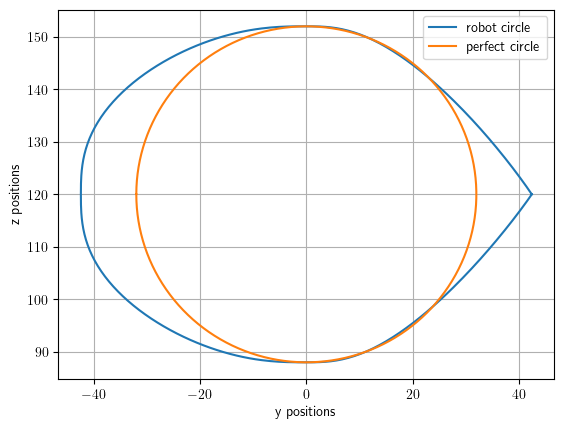

In [59]:
# perfect circle
r = 32
theta = np.arange(-np.pi, np.pi, 0.01)
x = 150 * np.ones(len(theta))
y = r * np.cos(theta)
z = 120 + r * np.sin(theta)

plt.figure(1)
plt.plot(ypos, zpos, label='robot circle')
plt.plot(y, z, label='perfect circle')
plt.grid(True)
plt.xlabel('y positions')
plt.ylabel('z positions')
plt.legend()
plt.show()


#fig = plt.figure(2)
#ax = fig.add_subplot(111, projection='3d')
#ax.plot3D(xpos, ypos, zpos)
#ax.plot3D(x, y, z)

#ax.set_xlabel('x positions')
#ax.set_ylabel('y positions')
#ax.set_zlabel('z positions')
#ax.grid(True)
#plt.show()

# Problem 8

Plot the condition number of the Jacobian matrix of the manipulator along the path from Problem 3 as well as along the actual path from Problem 6 or 7, and evaluate if the path includes any singularities.

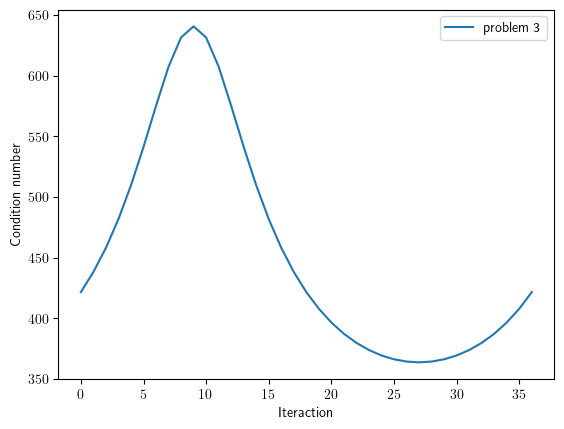

In [60]:
cond3 = []
cond6 = []

for i in range(len(phi)):
    J4, J5 = jacobian(ED_rad[i,0], ED_rad[i,1], ED_rad[i,2], ED_rad[i,3])
    J4 = np.array(J4.evalf(3)).astype(np.float64)
    cond3.append(np.linalg.cond(J4))

plt.figure(3)
plt.plot(cond3, label="problem 3")
plt.xlabel("Iteraction")
plt.ylabel("Condition number")
plt.legend()
plt.show()

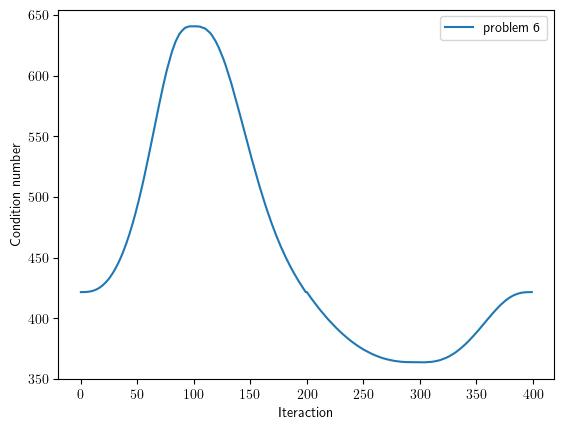

In [61]:
for i in range(len(q1)):
    for k in range(len(q1[0])):
        J4, J5 = jacobian(q1[i, k], q2[i, k], q3[i, k], q4[i, k])
        J4 = np.array(J4.evalf(3)).astype(np.float64)
        cond6.append(np.linalg.cond(J4))
        
plt.figure(4)
plt.plot(cond6, label="problem 6")
plt.xlabel("Iteraction")
plt.ylabel("Condition number")
plt.legend()
plt.show()

# Problem 9

Neglecting the own mass of the robot arm, and assuming a weight of $1 N$ along the negative $z_0$ direction, calculate and plot all joint torques $\tau_1, \tau_2, \tau_3, \tau_4$ as a function of the position $\varphi \in [0, 2\pi]$

In [62]:
t13 = []
t23 = []
t33 = []
t43 = []
F = sp.Matrix([0, 0, -1, 0, 0, 0])  # Define force applied on the segments

# Calculate torques for pb3
for k in range(37):
    J_1, J_2, J_3, J_4, J_5 = big_jacobian(ED_rad[k, 0], ED_rad[k, 1], ED_rad[k, 2], ED_rad[k, 3])
    t13.append(J_1.T*F)
    t23.append(J_2[:, 1].T* F)
    t33.append(J_3[:, 2].T* F)
    t43.append(J_4[:, 3].T* F)
t3 = sp.Matrix([t13, t23, t33, t43]).T


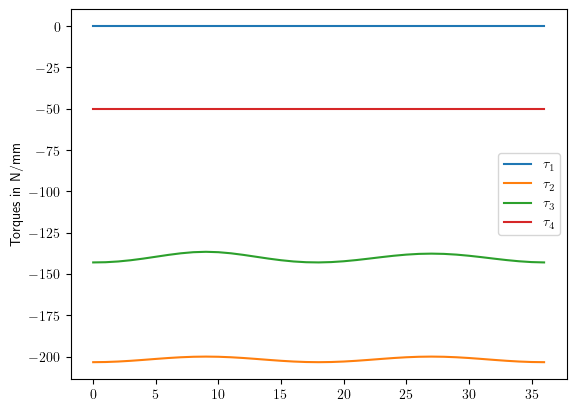

In [63]:

plt.figure(5)
plt.plot(t3[:,0], label=r'$\tau_1$')
plt.plot(t3[:,1], label=r'$\tau_2$')
plt.plot(t3[:,2], label=r'$\tau_3$')
plt.plot(t3[:,3], label=r'$\tau_4$')
plt.ylabel('Torques in N/mm')
plt.legend()
plt.show()

In [64]:
t16 = []
t26 = []
t36 = []
t46 = []
t6 = []
# Calculate torques for pb6
for i in range(len(q1)):
    for k in range(len(q1[0])):
        J_1, J_2, J_3, J_4, J_5 = big_jacobian(q1[i, k], q2[i, k], q3[i, k], q4[i, k])
        t16.append(J_1.T*F)
        t26.append(J_2[:, 1].T* F)
        t36.append(J_3[:, 2].T* F)
        t46.append(J_4[:, 3].T* F)

t6 = sp.Matrix([t16, t26, t36, t46]).T

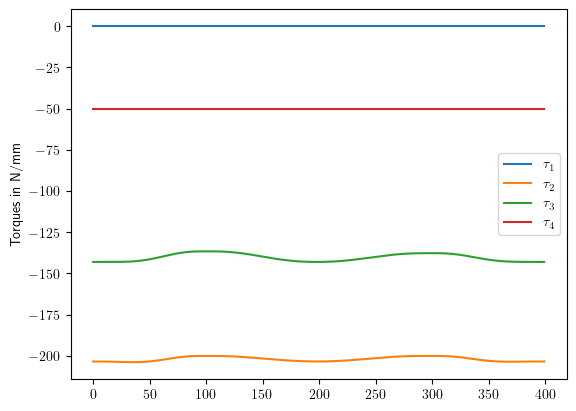

In [65]:
plt.figure(6)
plt.plot(t6[:,0], label=r'$\tau_1$')
plt.plot(t6[:,1], label=r'$\tau_2$')
plt.plot(t6[:,2], label=r'$\tau_3$')
plt.plot(t6[:,3], label=r'$\tau_4$')
plt.ylabel('Torques in N/mm')
plt.legend()
plt.show()

# Problem 10


In [66]:
D1 = sp.Matrix([
    [35.223,    0,  0],
    [0,     14.09,  0],
    [0,     0,      31.7]
])
D2 = sp.Matrix([
    [15.85,    0,  0],
    [0,     49.312,  0],
    [0,     0,      42.268]
])
D3 = D2
D4 = sp.Matrix([
    [17.612,    0,  0],
    [0,     17.612,  0],
    [0,     0,      17.612]
])
D = [D1, D2, D3, D4]
theta = [sp.symbols(f'theta{i}') for i in range(1, 4)]
dhcm = sp.Matrix([
    [theta[0], 30, 0, sp.pi/2],
    [theta[1],  0,  63, 0],
    [theta[2],  0,  63, 0],
])
#    theta_i     d_i   a_i   alpha_i
Tcm = [sp.Matrix([
            [sp.cos(dhcm[i, 0]), -sp.sin(dhcm[i, 0])*sp.cos((dhcm[i, 3])), sp.sin(dhcm[i, 0])*sp.sin((dhcm[i, 3])), dhcm[i, 2]*sp.cos(dhcm[i, 0])],
            [sp.sin(dhcm[i, 0]), sp.cos(dhcm[i, 0])*sp.cos((dhcm[i, 3])), -sp.cos(dhcm[i, 0])*sp.sin((dhcm[i, 3])), dhcm[i, 2]*sp.sin(dhcm[i, 0])],
            [0, sp.sin(dhcm[i, 3]), sp.cos(dhcm[i, 3]), dhcm[i, 1]],
            [0, 0, 0, 1]
        ]) for i in range(len(theta))]
T02cm = Tcm[0]*Tcm[1]
T03cm = T02cm*Tcm[2]

Trcm = sp.Matrix([
    [1,    0,  0,   -25],
    [0,    1,  0,   15],
    [0,    0,  1,   0],
    [0,    0,  0,   1]
])

T04cm = T03cm*Trcm

T0 = [Tcm[0], T02cm, T03cm, T04cm]
#sp.pprint(T04cm.applyfunc(sp.trigsimp))

J1cm, J2cm, J3cm, J4cm = anal_jacobian_10()
Jacobians = [J1cm, J2cm, J3cm, J4cm]
#sp.pprint(J4cm)
mass = sp.Matrix([60e-3, 80e-3, 80e-3, 40e-3]) # kg
g = sp.Matrix([0, 0, 9810]) # mm/s^2
Dq = sp.zeros(4,4)
for i, Jacobian in enumerate(Jacobians):
    Jv = sp.Matrix(Jacobian[0:3,:])
    Jw = sp.Matrix(Jacobian[3:6,:])
    while(len(Jv[0,:])<4):
        Jv = Jv.col_insert(1,sp.zeros(3,1))
    while(len(Jw[0,:])<4):
        Jw = Jw.col_insert(1,sp.zeros(3,1))  
    R = T0[i]
    R = R[0:3,0:3]
    
    res = mass[i]*Jv.T*Jv + Jw.T*R*D[i]*R.T*Jw
    Dq = Dq + res
Dq = Dq.applyfunc(sp.trigsimp)
Dq_values = Dq.evalf(4)
print("D(q):")
sp.pprint(Dq_values)

D(q):
⎡-245.7⋅sin(θ₃) - 148.2⋅sin(2⋅(θ₂ + θ₃)) - 245.7⋅sin(2⋅θ₂ + θ₃) + 532.7⋅cos(2⋅θ₂) + 622.4⋅cos(θ₃) + 175.2⋅cos(2⋅(θ₂ + θ₃)) + 622.4⋅cos(2⋅θ₂ + θ₃) + 829.8                                 0                                                                                                                                                                0                                                                                                                                                                                                                                                               0                                                                                                                               ⎤
⎢                                                                                                                                                                                                                                                                    

In [67]:
oc1 = T0[0]
oc1 = oc1[0:3,3] + sp.Matrix([0,0,-20])
oc2 = T0[1]
oc2 = oc2[0:3,3] + sp.Matrix([0,0,-30])
oc3 = T0[2]
oc3 = oc3[0:3,3] + sp.Matrix([0,0,-30])
oc4 = T0[3]
oc4 = oc4[0:3,3] + sp.Matrix([-15,0,-25])

oc = [oc1, oc2, oc3, oc4]
P = 0
for i in range(len(mass)):
    res = mass[i]*g.T*oc[i]
    P = P + res[0,0]
#P = sp.Matrix(P).applyfunc(sp.trigsimp)
print("P:")
sp.pprint(sp.trigsimp(P).evalf(4))
print("-----------------------")

theta = [sp.symbols(f'theta{i}') for i in range(1, 5)]
g1 = sp.diff(P, theta[0])
g2 = sp.diff(P, theta[1])
g3 = sp.diff(P, theta[2])
g4 = sp.diff(P, theta[3])
gp = sp.Matrix([g1,g2,g3,g4]).applyfunc(sp.trigsimp)
print("g(q):")
sp.pprint(gp.evalf(4))
print("-----------------------")

P:
1.236e+5⋅sin(θ₂) + 6.435e+4⋅sin(θ₂ + θ₃) + 5886.0⋅cos(θ₂ + θ₃) + 7848.0
-----------------------
g(q):
⎡                               0                               ⎤
⎢                                                               ⎥
⎢-5886.0⋅sin(θ₂ + θ₃) + 1.236e+5⋅cos(θ₂) + 6.435e+4⋅cos(θ₂ + θ₃)⎥
⎢                                                               ⎥
⎢         -5886.0⋅sin(θ₂ + θ₃) + 6.435e+4⋅cos(θ₂ + θ₃)          ⎥
⎢                                                               ⎥
⎣                               0                               ⎦
-----------------------


In [68]:
Cq = [[[0 for _ in range(4)] for _ in range(4)] for _ in range(4)]

for i in range(4):
    for j in range(4):
        for k in range(4):
            term1 = sp.trigsimp(sp.diff(Dq[k, j], theta[i])).evalf(4)
            term2 = sp.trigsimp(sp.diff(Dq[k, i], theta[j])).evalf(4)
            term3 = sp.trigsimp(sp.diff(Dq[i, j], theta[k])).evalf(4)
            Cq[i] [j] [k] = 0.5 * (term1 + term2 - term3)

#Cq = Cq.applyfunc(sp.trigsimp)
print("C(q):")
sp.pprint(Cq)#.evalf(4))

C(q):
[[[0, 532.703125⋅sin(2⋅θ₂) + 175.201171875⋅sin(2⋅(θ₂ + θ₃)) + 622.4375⋅sin(2⋅θ₂ + θ₃) + 148.19921875⋅cos(2⋅(θ₂ + θ₃)) + 245.69921875⋅cos(2⋅θ₂ + θ₃), 311.21875⋅sin(θ₃) + 175.201171875⋅sin(2⋅(θ₂ + θ₃)) + 311.21875⋅sin(2⋅θ₂ + θ₃) + 122.849609375⋅cos(θ₃) + 148.19921875⋅cos(2⋅(θ₂ + θ₃)) + 122.849609375⋅cos(2⋅θ₂ + θ₃), 0], [-532.703125⋅sin(2⋅θ₂) - 175.201171875⋅sin(2⋅(θ₂ + θ₃)) - 622.4375⋅sin(2⋅θ₂ + θ₃) - 148.19921875⋅cos(2⋅(θ₂ + θ₃)) - 245.69921875⋅cos(2⋅θ₂ + θ₃), 0, 0, 0], [-311.21875⋅sin(θ₃) - 175.201171875⋅sin(2⋅(θ₂ + θ₃)) - 311.21875⋅sin(2⋅θ₂ + θ₃) - 122.849609375⋅cos(θ₃) - 148.19921875⋅cos(2⋅(θ₂ + θ₃)) - 122.849609375⋅cos(2⋅θ₂ + θ₃), 0, 0, -8.88178419700125e-16⋅sin(2⋅θ₁) + 4.44089209850063e-16⋅sin(2⋅(-θ₁ + θ₂ + θ₃)) - 4.44089209850063e-16⋅sin(2⋅(θ₁ + θ₂ + θ₃))], [0, 0, -8.88178419700125e-16⋅sin(2⋅θ₁) + 4.44089209850063e-16⋅sin(2⋅(-θ₁ + θ₂ + θ₃)) - 4.44089209850063e-16⋅sin(2⋅(θ₁ + θ₂ + θ₃)), 0]], [[-532.703125⋅sin(2⋅θ₂) - 175.201171875⋅sin(2⋅(θ₂ + θ₃)) - 622.4375⋅sin(2⋅θ₂ + θ₃) - 

In [208]:
C1 = [0,0,0,0]
C2 = [0,0,0,0]
C3 = [0,0,0,0]
C4 = [0,0,0,0]
C5 = [0,0,0,0]

for i in range(4):
    C1[i] = Cq[i]
    C2[i] = Cq[i]
    C3[i] = Cq[i]
    C4[i] = Cq[i]
    C5[i] = Cq[i]

tau1 = []
tau2 = []
tau3 = []
tau4 = []

symq1 = sp.Matrix(np.concatenate((q1_1, q1_2, q1_3, q1_4)))
symq2 = sp.Matrix(np.concatenate((q1_2, q2_2, q2_3, q2_4)))
symq3 = sp.Matrix(np.concatenate((q3_1, q3_2, q3_3, q3_4)))
symq4 = sp.Matrix(np.concatenate((q4_1, q4_2, q4_3, q4_4)))

symdq = sp.Matrix(dq)
symddq = sp.Matrix(ddq)
for k in range(symdq.shape[1]):
    for i in range(4):
        for j in range(4):
            g2 = g1.subs(theta[0], symq1[k])
            g3 = g2.subs(theta[1], symq2[k])
            g4 = g3.subs(theta[2], symq3[k])
            g5 = g4.subs(theta[3], symq4[k])

            for z in range(4):
                C2[z] = C1[z].subs(theta[0], symq1[k])
                C3[z] = C2[z].subs(theta[1], symq2[k])
                C4[z] = C3[z].subs(theta[2], symq3[k])
                C5[z] = C4[z].subs(theta[3], symq4[k])

            D2 = Dq.subs(theta[0], symq1[k])
            D3 = D2.subs(theta[1], symq2[k])
            D4 = D3.subs(theta[2], symq3[k])
            D5 = D4.subs(theta[3], symq4[k])

            Cw = C5[i]
            tau1.append(D5[0,j]*symddq[j,k]+Cw[j,0]*symdq[i,k]*symdq[j,k] + g5[0])
            tau2.append(D5[1,j]*symddq[j,k]+Cw[j,1]*symdq[i,k]*symdq[j,k] + g5[1])
            tau3.append(D5[2,j]*symddq[j,k]+Cw[j,2]*symdq[i,k]*symdq[j,k] + g5[2])
            tau4.append(D5[3,j]*symddq[j,k]+Cw[j,3]*symdq[i,k]*symdq[j,k] + g5[3])
tt1 = np.abs(tau1) 
tt2 = np.abs(tau2) 
tt3 = np.abs(tau3)
tt4 = np.abs(tau4) 

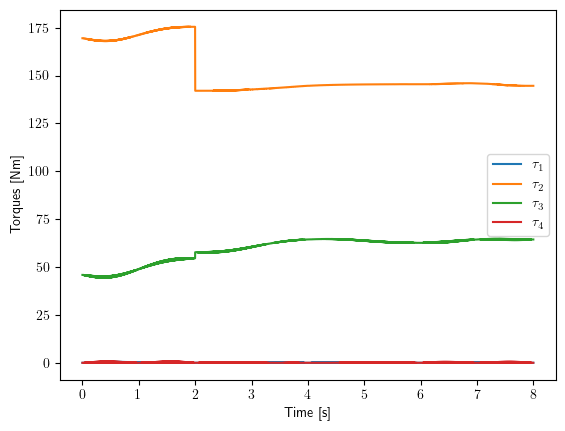

In [216]:
time = np.linspace(0, 8, len(tau1))
plt.figure(7)
plt.plot(time, tt1/1e3)
plt.plot(time, tt2/1e3)
plt.plot(time, tt3/1e3)
plt.plot(time, tt4/1e3)
plt.legend([r'$\tau_1$', r'$\tau_2$', r'$\tau_3$', r'$\tau_4$'])
plt.ylabel('Torques [Nm]')
plt.xlabel('Time [s]')
plt.show()